# Seaborn Intro Problems

**import seaborn as sns**

## Advanced

In [3]:
# Importing Libraries
import ast
import pandas as pd
# import numpy as np
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


### Top Companies Bar Plot (2.20.1) - Problem

Create a Seaborn bar plot to visualize the top 5 companies with the highest median **salary_year_avg** for Data Scientist job postings in the United States.

Hint:

Use **sns.barplot()** to create the bar plot and sort the companies by median salary.

In [4]:
# Only get Data Scientist jobs in the US
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DS_US.dropna(subset=['salary_year_avg'])

In [6]:
df_DS_top_pay = df_DA_US.groupby('company_name')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DS_top_pay = df_DS_top_pay.head(5)
df_DS_top_pay

,count,median
company_name,,
ReServe,1,585000.0
"East River Electric Power Cooperative, Inc.",2,537000.0
Lands End,1,375000.0
"Analog Devices, Inc",1,375000.0
Blue Cross and Blue Shield of Minnesota,1,375000.0


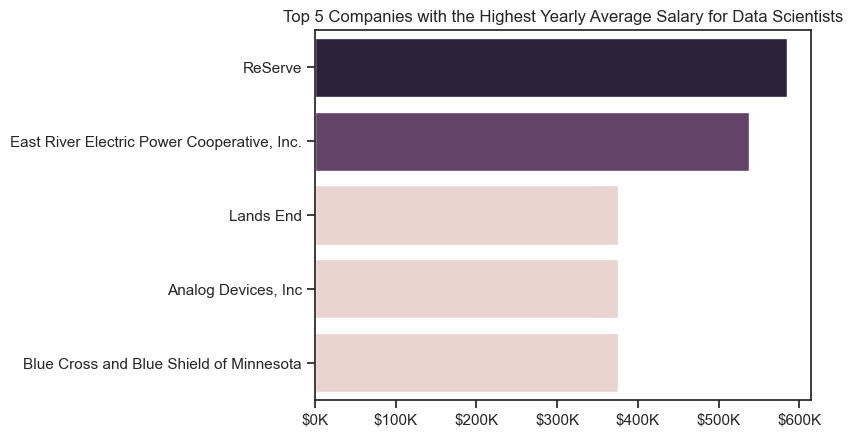

In [19]:
# Plotting Version a
fig, ax = plt.subplots()
sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax, hue='median') 
ax.legend().remove()
ax.set_title('Top 5 Companies with the Highest Yearly Average Salary for Data Scientists')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


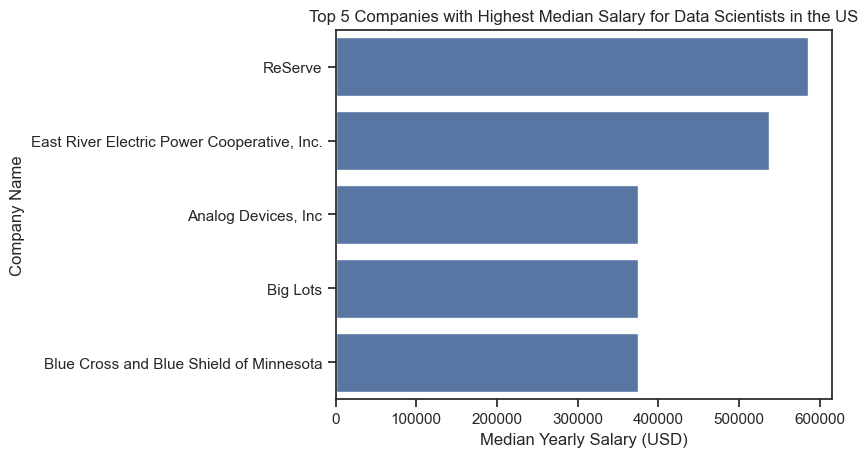

In [ ]:
# Plotting Version b (Luke's code)
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

### Data Scientist Salary Histogram (2.20.2) - Problem

Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the **salary_year_avg** column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
- Use 25 bins for the histogram and set the x-axis limit to 700,000.
- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

Hint:

Use the **sns.histplot()** function to create the histogram and filter the DataFrame using boolean indexing.

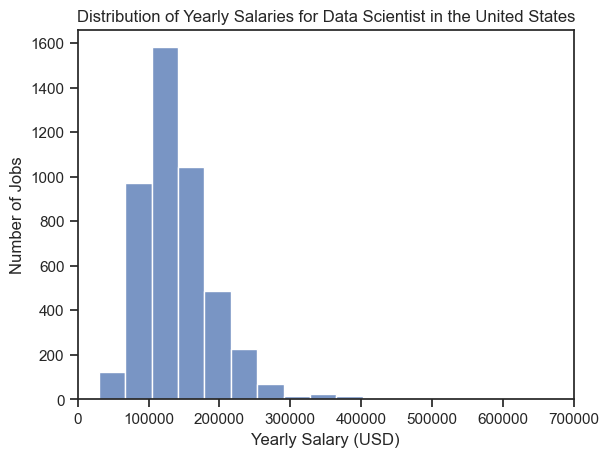

In [32]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
salary_DS_US = df_DS_US['salary_year_avg']

sns.histplot(data=salary_DS_US, bins=25)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 700_000)
plt.ylabel('Number of Jobs')
plt.show()

### Data Roles Salary Box Plot (2.20.3) - Problem

Create a box plot using Seaborn to compare the yearly salaries (use the **salary_year_avg** column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
- Set the x-axis limit to 300,000 and format it as $100k.
- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

Code Needed:

`job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']`

Hint:

Use the **sns.boxplot()** function to visualize the salary distributions and format the x-axis labels to reflect thousands as 'k' using **plt.FuncFormatter**.

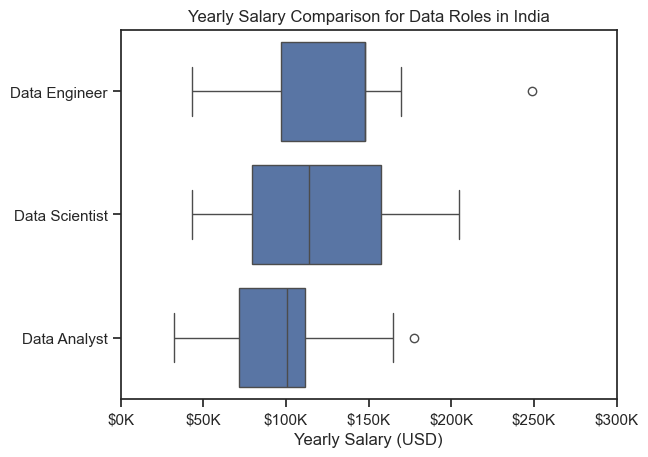

In [39]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_India = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg']).copy()


sns.set_theme(style='ticks')
sns.boxplot(data=df_India, x='salary_year_avg', y='job_title_short') 
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 300000)
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

### Salary Distribution for United States (2.20.4) - Problem

- Create a violin plot using Seaborn to visualize the distribution of **salary_year_avg** for Data Scientist roles in the United States.
- Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

Hint:

- Use **sns.violinplot()** with the **x** parameter set to **job_country** and the **y** parameter set to **salary_year_avg**.
- Utilize **plt.ylim()** and **plt.gca().yaxis.set_major_formatter()** to set and format the salary axis.


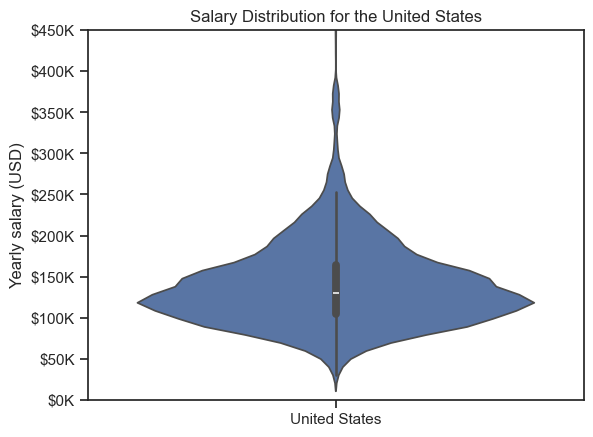

In [56]:
# filter for the job titles and country
df_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

sns.violinplot(data=df_US, x='job_country', y='salary_year_avg')
plt.title('Salary Distribution for the United States')
plt.xlabel('')
plt.ylabel('Yearly salary (USD)')
plt.ylim(0, 450_000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_x)
plt.show()